# Get Data

In [1]:
!mkdir ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=81b1bab796e4f7024d0f4a6c5891be45ef5865496c8b151578d419c994467ad5
  Stored in directory: /root/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [7]:
!kaggle datasets download -d andrewmvd/road-sign-detection

 96%|██████████████████████████████████████▎ | 209M/218M [00:02<00:00, 73.3MB/s]
100%|████████████████████████████████████████| 218M/218M [00:02<00:00, 78.7MB/s]


In [9]:
!unzip road-sign-detection.zip

Archive:  road-sign-detection.zip
  inflating: annotations/road0.xml   
  inflating: annotations/road1.xml   
  inflating: annotations/road10.xml  
  inflating: annotations/road100.xml  
  inflating: annotations/road101.xml  
  inflating: annotations/road102.xml  
  inflating: annotations/road103.xml  
  inflating: annotations/road104.xml  
  inflating: annotations/road105.xml  
  inflating: annotations/road106.xml  
  inflating: annotations/road107.xml  
  inflating: annotations/road108.xml  
  inflating: annotations/road109.xml  
  inflating: annotations/road11.xml  
  inflating: annotations/road110.xml  
  inflating: annotations/road111.xml  
  inflating: annotations/road112.xml  
  inflating: annotations/road113.xml  
  inflating: annotations/road114.xml  
  inflating: annotations/road115.xml  
  inflating: annotations/road116.xml  
  inflating: annotations/road117.xml  
  inflating: annotations/road118.xml  
  inflating: annotations/road119.xml  
  inflating: annotations/road12.xm

# Setup Yolov5

In [10]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14672, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 14672 (delta 144), reused 200 (delta 127), pack-reused 14446
Receiving objects: 100% (14672/14672), 13.52 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (10117/10117), done.


In [12]:
%%bash
cd yolov5 
pip install -r requirements.txt

In [ ]:
import os 
import xml.etree.ElementTree as ET

In [57]:
def convert_box(size, box):
    dw, dh = 1. / size[0], 1. / size[1]
    x, y, w, h = (box[0] + box[1]) / 2.0 - 1, (box[2] + box[3]) / 2.0 - 1, box[1] - box[0], box[3] - box[2]
    return x * dw, y * dh, w * dw, h * dh

In [ ]:
!rm -rf datasets

In [60]:
for anno in os.listdir('./data/labels'):
    if anno.split('.')[1] == 'xml':
        file_name = anno.split('.')[0]
        out_file = open(f'./data/labels/{file_name}.txt', 'w')
        
        tree = ET.parse(os.path.join('data','labels', anno))
        root = tree.getroot()
        size = root.find('size')        
        w = int(size.find('width').text)
        h = int(size.find('height').text)

        names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']
        
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls in names and int(obj.find('difficult').text) != 1:
                xmlbox = obj.find('bndbox')
                bb = convert_box((w, h), [float(xmlbox.find(x).text) for x in ('xmin', 'xmax', 'ymin', 'ymax')])
                cls_id = names.index(cls)  # class id
                out_file.write(" ".join([str(a) for a in (cls_id, *bb)]) + '\n')

In [ ]:
# # Write out this YAML
# path: ../data
# train: # train images (relative to 'path')  16551 images
#   - images
# val: # val images (relative to 'path')  4952 images
#   - images

# # Classes
# names:
#   0: trafficlight
#   1: speedlimit
#   2: crosswalk
#   3: stop

# Get Stuff Up and Running

In [27]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os 

In [62]:
%%bash
#cp yolov5/data/VOC.yaml yolov5/VOC.yaml 

In [ ]:
%%bash
cd yolov5 
python train.py --img 320 --batch 16 --epochs 500 --data customVOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=customVOC.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-231-g0039870 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro P5000, 16279MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-9 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro P5000, 16279MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


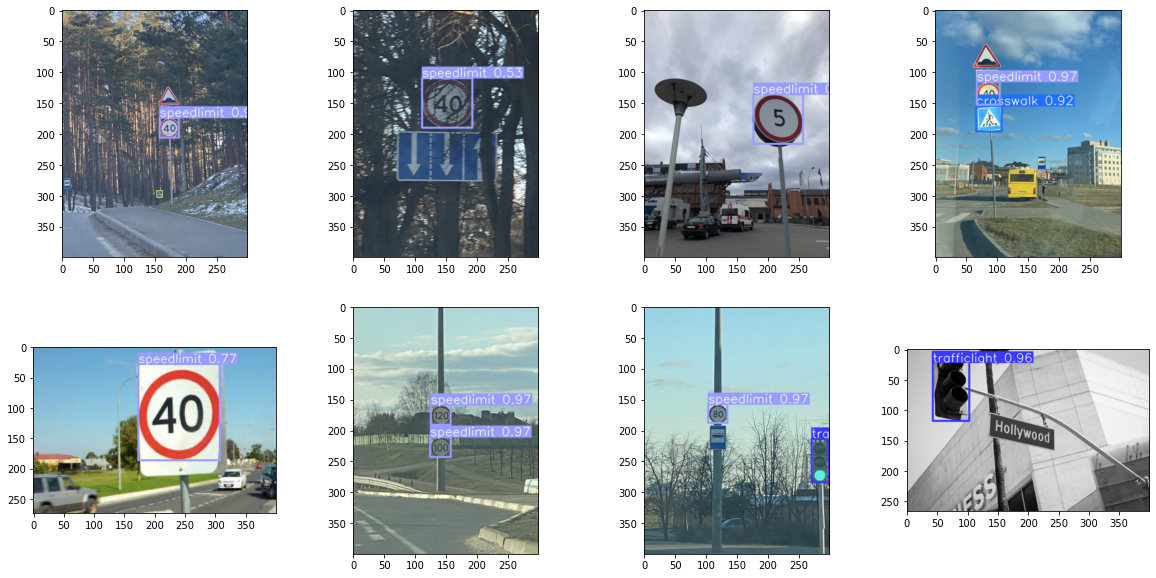

In [35]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('./data/images')

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data/images/{imgname}')
    results = model(img)
    ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))